# Folder Path

In [6]:
from email.mime import base
import os


# set the directory you want to list
#base_data_dir = '/Users/akmaurya/Library/CloudStorage/OneDrive-SLACNationalAcceleratorLaboratory/My Onedrive/Data_01/Redesigned_Plastics/PHAs_BL17_2_data/Tensile_Data/'
base_data_dir = '/Users/akmaurya/OneDrive - Stanford/Data_01/Redesigned_Plastics/May_2025/Tensile/Anjani/insitu_fiber'
#base_data_dir = '/Users/akmaurya/Desktop/20240628/TS600'
# list the contents of the directory
contents = os.listdir(base_data_dir)

# sort the list of contents
sorted_contents = sorted(contents)

# print the sorted list line by line
for file_name in sorted_contents:
    print(file_name)


.DS_Store
Figures
Run10_01_insitu_PET_02_50rpm_1mmmin.tns
Run10_01_insitu_PET_02_50rpm_1mmmin.xls
Run10_insitu_PET_02_50rpm_1mmmin.tns
Run10_insitu_PET_02_50rpm_1mmmin.xls
Run11_insitu_PET_02_50rpm_1mmmin.tns
Run11_insitu_PET_02_50rpm_1mmmin.xls
Run12_insitu_PET_02_50rpm_3mmmin.tns
Run12_insitu_PET_02_50rpm_3mmmin.xls
Run13_insitu_PHA3B_02_50rpm_3mmmin.tns
Run13_insitu_PHA3B_02_50rpm_3mmmin.xls
Run14_insitu_PLLA_02_50rpm_3mmmin.tns
Run14_insitu_PLLA_02_50rpm_3mmmin.xls
Run15_insitu_PET_02_50rpm_3mmmin.tns
Run15_insitu_PET_02_50rpm_3mmmin.xls
Run16_insitu_PHA3B_02_50rpm_3mmmin.tns
Run16_insitu_PHA3B_02_50rpm_3mmmin.xls
Run17_insitu_PHA3B_02_50rpm_3mmmin.tns
Run17_insitu_PHA3B_02_50rpm_3mmmin.xls
Run18_insitu_PHA3B_02_50rpm_3mmmin_noWAXS.tns
Run19_insitu_PET_02_50rpm_3mmmin_noWAXS.tns
Run1_insitu_PHA3B_50rpm_01_1p5mmmin.tns
Run2_insitu_PHA3B_50rpm_01_2mmmin.tns
Run4_insitu_PLLA_02_50rpm_0p5mmmin.tns
Run4_insitu_PLLA_02_50rpm_0p5mmmin.xls
Run5_insitu_PET_02_50rpm_1mmmin.tns
Run5_insitu_PE

# useful functions

In [7]:
def set_plot_style(axs, fonts, xlabel, ylabel):
    axs.set_xlabel(xlabel, fontsize=fonts)
    axs.set_ylabel(ylabel, fontsize=fonts)
    axs.tick_params(axis='both', which='major', direction='out', length=4, width=1)
    axs.tick_params(which='minor', width=1, size=2)  # Adjust size as needed
    #axs.grid(False, which='both', axis='both', linestyle='--', linewidth=0.5)
    axs.set_facecolor('white')
    axs.spines['top'].set_linewidth(1)
    axs.spines['right'].set_linewidth(1)
    axs.spines['bottom'].set_linewidth(1)
    axs.spines['left'].set_linewidth(1)
    axs.tick_params(axis='x', labelsize=fonts)
    axs.tick_params(axis='y', labelsize=fonts)

    return axs


# Read tensile data

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='olefile')


def read_and_return_data(folder_path, file_name, length=5, shift=0):
    file_path = os.path.join(folder_path, file_name)
    
    # Read the Excel file (skip metadata rows)
    df = pd.read_excel(file_path, skiprows=6)
    df = df.dropna(how='all')

    # Clean column names by stripping whitespace and newlines
    df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace('  ', ' ')
    
    try:
        time = df['Time [h:m:s]']
        displacement = df['Displacement [mm]']
        stress = df['Stress [N/mm²]']
        relative_force = df['Relative Force [N]']
    except KeyError:
        print(f"Column names not found in: {file_name}")
        print("Available columns:", df.columns.tolist())
        return None

    elongation_percent_tmp = 100 * displacement / length
    elongation_percent = [xi + shift for xi in elongation_percent_tmp]

    return {
        'time': time.tolist(),
        'elongation_percent': elongation_percent,
        'stress': stress.tolist(),
        'relative_force': relative_force.tolist()
    }


# PHA-3B

Run10_01_insitu_PET_02_50rpm_1mmmin.xls
Run10_insitu_PET_02_50rpm_1mmmin.xls
Run11_insitu_PET_02_50rpm_1mmmin.xls
Run12_insitu_PET_02_50rpm_3mmmin.xls
Run13_insitu_PHA3B_02_50rpm_3mmmin.xls
Run14_insitu_PLLA_02_50rpm_3mmmin.xls
Run15_insitu_PET_02_50rpm_3mmmin.xls
Run16_insitu_PHA3B_02_50rpm_3mmmin.xls
Run17_insitu_PHA3B_02_50rpm_3mmmin.xls
Run4_insitu_PLLA_02_50rpm_0p5mmmin.xls
Run5_insitu_PET_02_50rpm_1mmmin.xls
Run6_insitu_PET_02_50rpm_1mmmin.xls
Run7_insitu_PLLA_02_50rpm_1mmmin.xls
Run8_insitu_PHA3B_02_50rpm_1mmmin.xls
Run9_insitu_PHA3B_02_50rpm_1mmmin.xls
WARNING *** file size (225025) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (221131) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


/var/folders/0q/m0d3p44n2cb5dg956r2m2f782yh1mf/T/ipykernel_1613/1791274418.py:33: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  elastic_patch = mpatches.Rectangle((-4, -0.003), 14, 0.303, color='blue', alpha=0.3, linewidth=0, edgecolor='none')
/var/folders/0q/m0d3p44n2cb5dg956r2m2f782yh1mf/T/ipykernel_1613/1791274418.py:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  softening_patch = mpatches.Rectangle((10, -0.003), 160, 0.303, color='blue', alpha=0.15, linewidth=0, edgecolor='none')
/var/folders/0q/m0d3p44n2cb5dg956r2m2f782yh1mf/T/ipykernel_1613/1791274418.py:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  hardening_patch = mpatches.Rectangle((170, -0.003), 390, 0.303, color='red', alpha=0.05, linewidth=0, edgecolor='none')


Figure saved at /Users/akmaurya/OneDrive - Stanford/Data_01/Redesigned_Plastics/May_2025/Tensile/Anjani/insitu_fiber/Figures/Run8.png


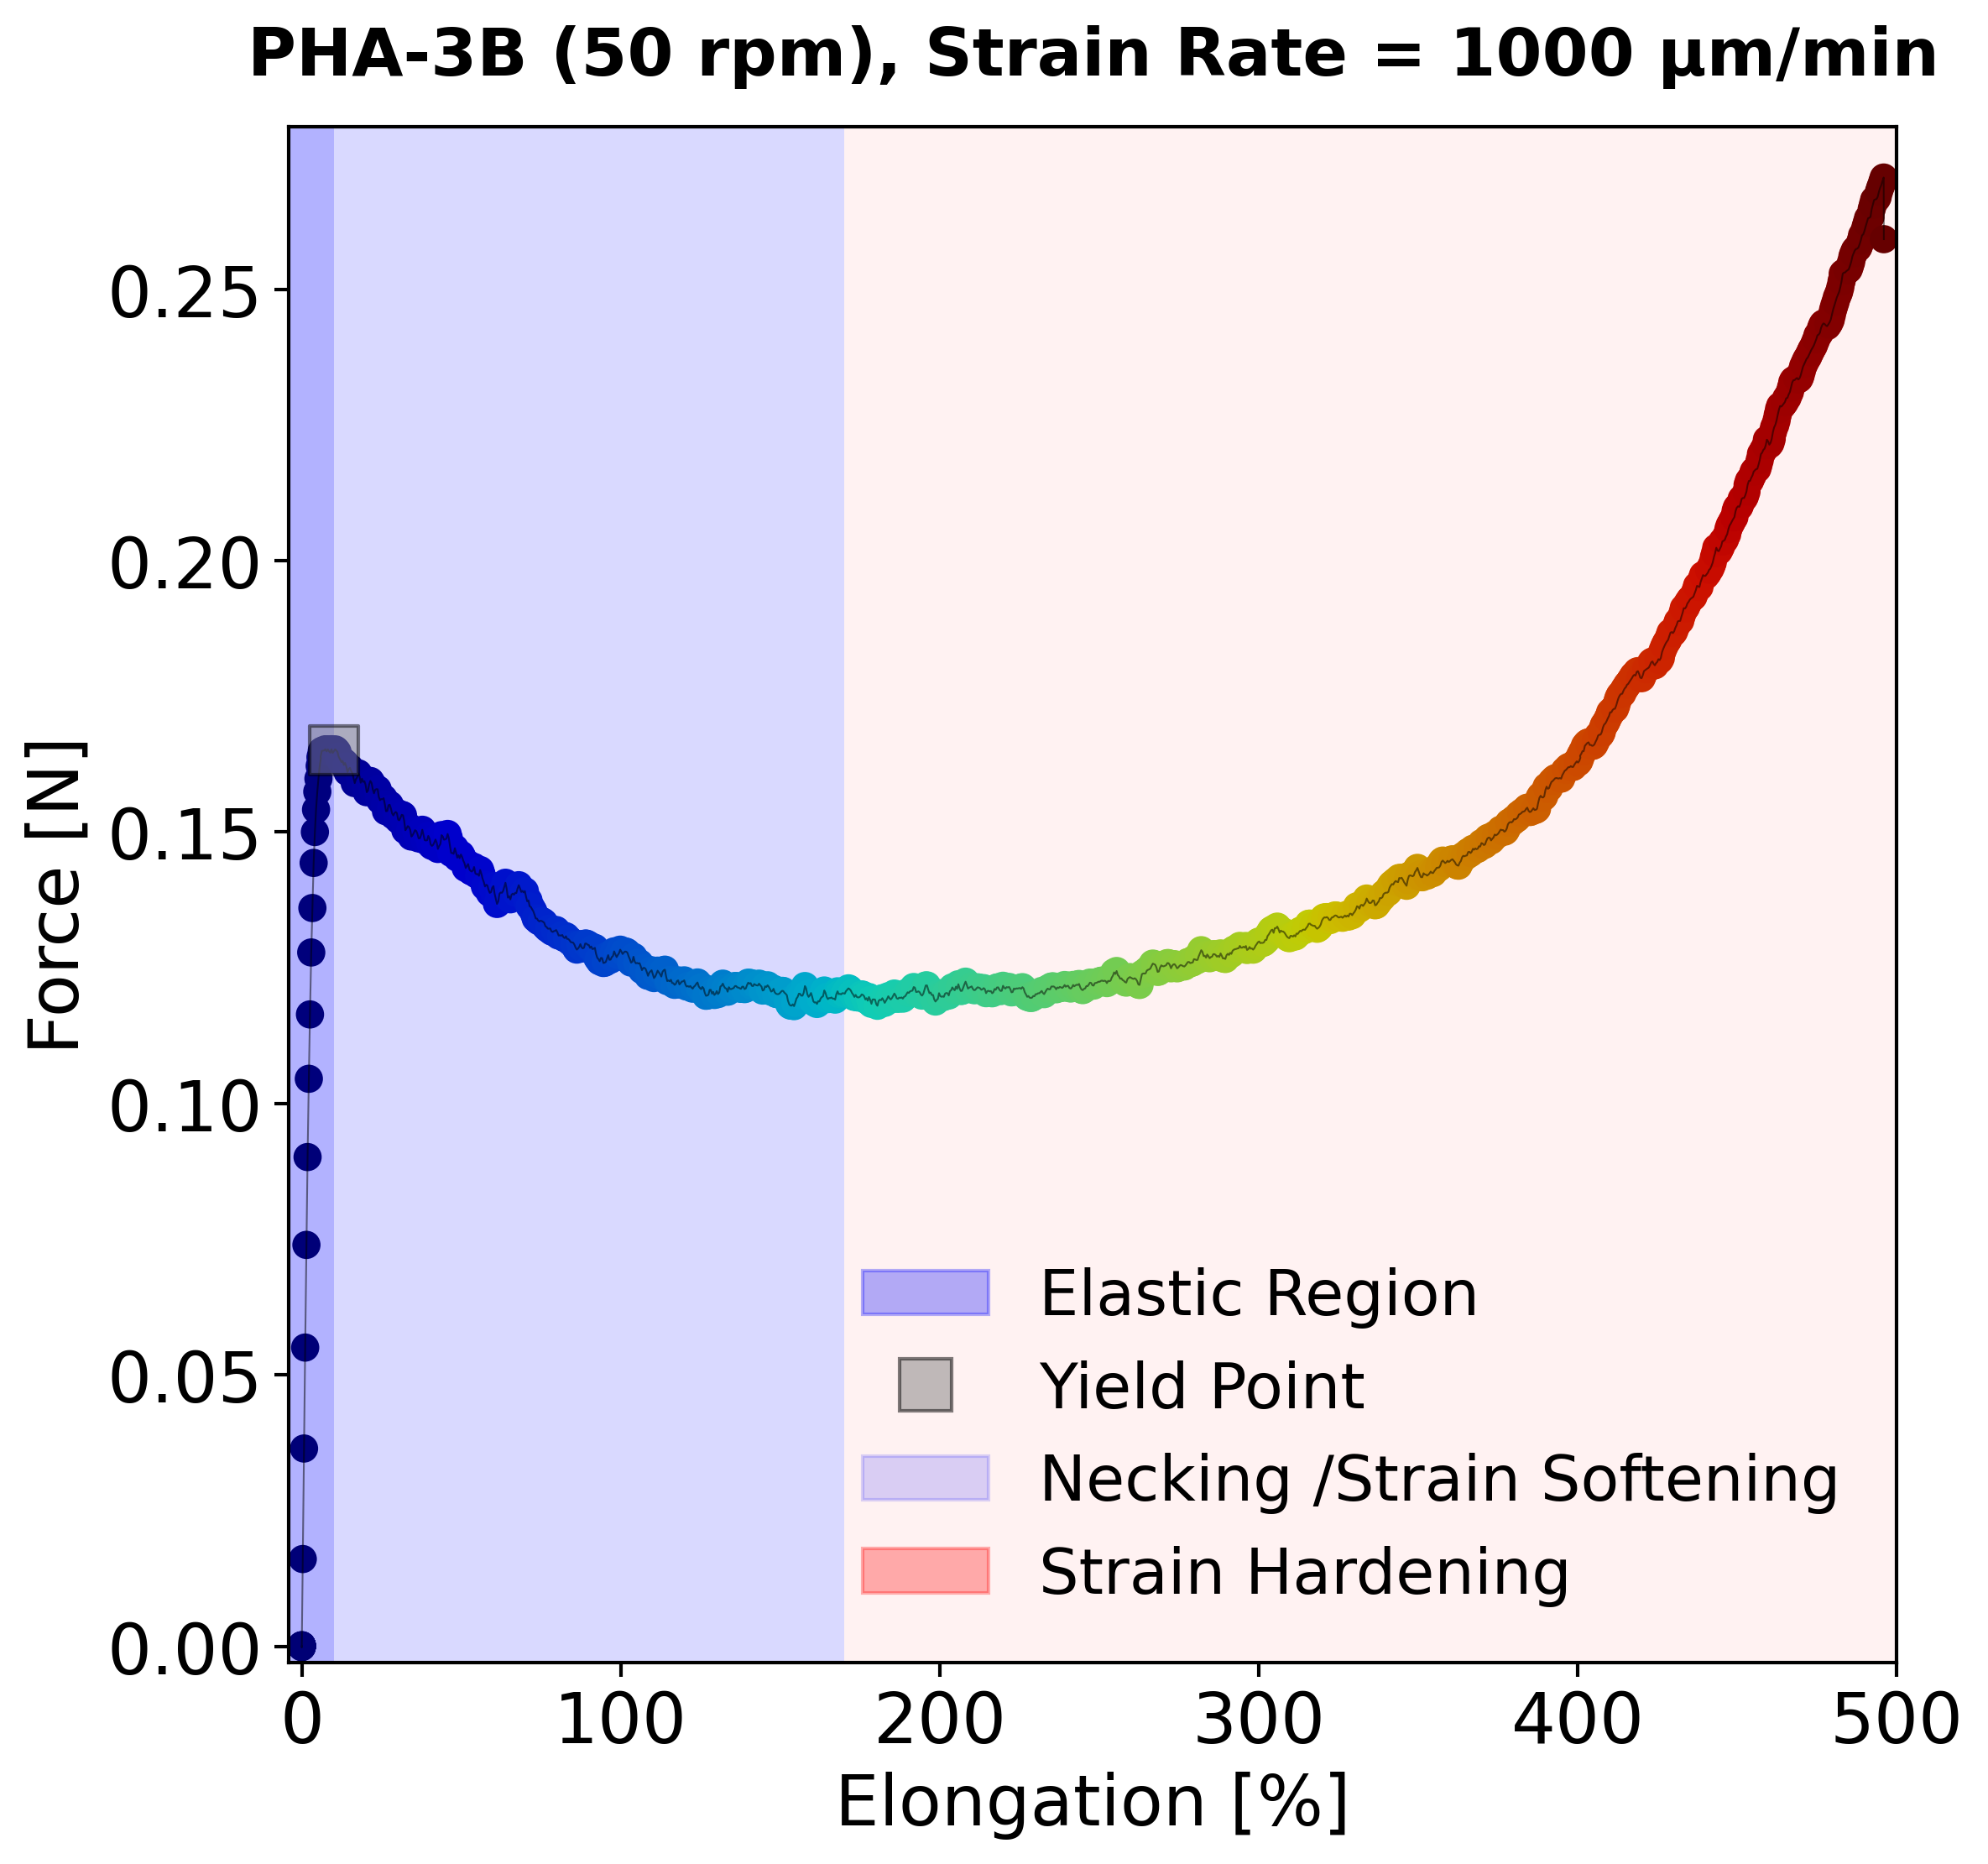

In [98]:
import os
from matplotlib import legend
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define your data folder path
data_folder = os.path.join(base_data_dir, '')

# Print all .xls files sorted
for file_name in sorted(os.listdir(data_folder)):
    if file_name.endswith('.xls'):
        print(file_name)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 7.5), dpi=300)

# Load datasets
file_name8 = 'Run8_insitu_PHA3B_02_50rpm_1mmmin.xls'
run8 = read_and_return_data(data_folder, file_name8, length=5)

file_name9 = 'Run5_insitu_PET_02_50rpm_1mmmin.xls'
run9 = read_and_return_data(data_folder, file_name9, length=5)

# Create colormap for run8 points
if run8:
    x = run8['elongation_percent']
    norm = plt.Normalize(0, len(x) - 1)
    colors = plt.cm.jet(norm(np.arange(len(x))))[:, :3] * 0.8  # darken colors

# Add shaded regions and yield point

elastic_patch = mpatches.Rectangle((-4, -0.003), 14, 0.303, color='blue', alpha=0.3, linewidth=0, edgecolor='none')
softening_patch = mpatches.Rectangle((10, -0.003), 160, 0.303, color='blue', alpha=0.15, linewidth=0, edgecolor='none')
hardening_patch = mpatches.Rectangle((170, -0.003), 390, 0.303, color='red', alpha=0.05, linewidth=0, edgecolor='none')


ax.add_patch(elastic_patch)
ax.add_patch(softening_patch)
ax.add_patch(hardening_patch)

# Create legend patches
elastic_legend = mpatches.Patch(color='blue', alpha=0.3, label='Elastic Region')
softening_legend = mpatches.Patch(color='blue', alpha=0.15, label='Necking /Strain Softening')
hardening_legend = mpatches.Patch(color='red', alpha=0.3, label='Strain Hardening')
ax.scatter([10], [0.165], color='gray', marker='s', s=200, edgecolor='black', label='Yield Point', zorder=5,alpha=0.5)
from matplotlib.lines import Line2D
yield_legend = Line2D([0], [0], marker='s', color='gray', label='Yield Point',
                      markerfacecolor='gray', markeredgecolor='black', markersize=15, linestyle='None', alpha=0.5)


# Add the legend
ax.legend(handles=[elastic_legend, yield_legend, softening_legend, hardening_legend], loc='best', fontsize=18, frameon=False)

# Plot data
if run8:
    ax.scatter(run8['elongation_percent'], run8['relative_force'], color=colors, s=50)
    ax.plot(run8['elongation_percent'], run8['relative_force'], '-', color='black', linewidth=0.5, alpha=0.5)

# Labels and styling
ax.set_xlabel('Elongation [%]')
ax.set_ylabel('Stress [N/mm²]')
set_plot_style(ax, fonts=20, xlabel='Elongation [%]', ylabel='Force [N]')
ax.set_xlim(-4,500)
ax.set_ylim(-0.003, 0.28)
ax.set_title('PHA-3B (50 rpm), Strain Rate = 1000 µm/min', fontsize=19, fontweight='bold',y=1.02)
plt.tight_layout()

# Save the figure
figures_dir = os.path.join(data_folder, 'Figures')
os.makedirs(figures_dir, exist_ok=True)
fig_path = os.path.join(figures_dir, 'Run8.png')
plt.savefig(fig_path, dpi=300)
print(f"Figure saved at {fig_path}")
